In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r'C:\Users\Damodar Vyas\Documents\AAIC\Datasets\haberman.csv')
columns = ['age', 'year', 'positive_nodes', 'survival_status']
df.columns= columns
df.columns

Index(['age', 'year', 'positive_nodes', 'survival_status'], dtype='object')

In [110]:
sns.set_style('darkgrid')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   year             306 non-null    int64
 2   positive_nodes   306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


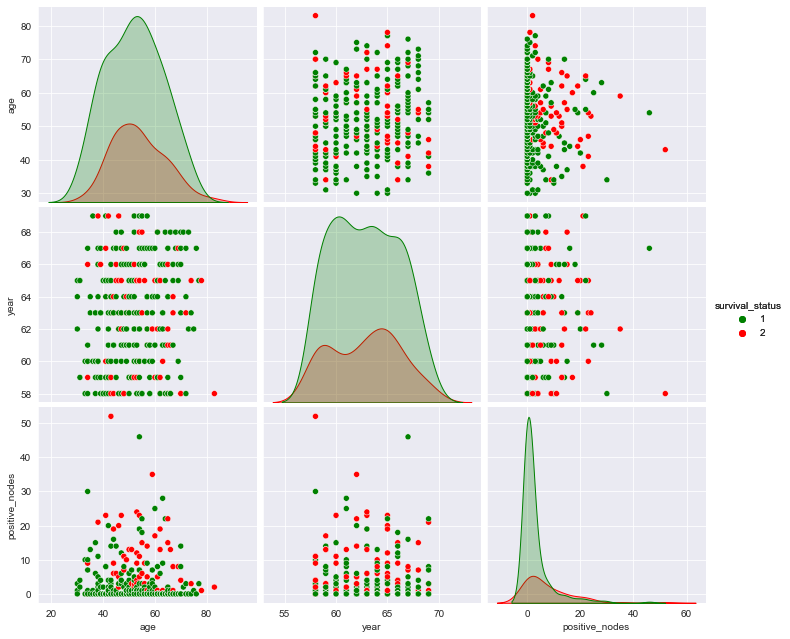

In [111]:
sns.pairplot(df, hue='survival_status', palette=['green', 'red'], height=3).add_legend()

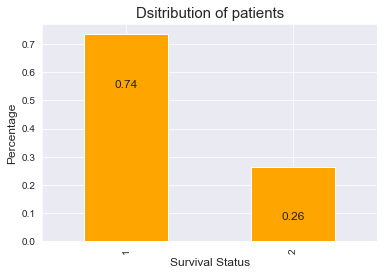

In [112]:
plots = df['survival_status'].value_counts(2).plot(kind='bar', color='orange')
plt.xlabel('Survival Status', size=12)
plt.ylabel('Percentage', size=12)
plt.title('Dsitribution of patients', size=15)

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                    size=12, xytext=(0, -50),
                    textcoords='offset points')
    

<pre>
Throughout, 1 = patient who survived more than 5 years
            2 = patient who died within 5 years
This shows that there are around 74% patients who survived for more than 5 years. 
However, around 26% of them died within 5 years

In [113]:
df.describe()

,age,year,positive_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<pre>
Here, we can assess that average patient age is 52 with the youngest being 30 and the oldest being 83. 
Data was collected from '58 to '69
The maximum number of positive nodes in a patient is 52. However, 75% of the patients have an average 5 nodes or less

D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


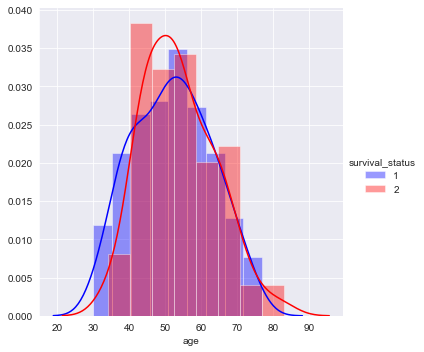

D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


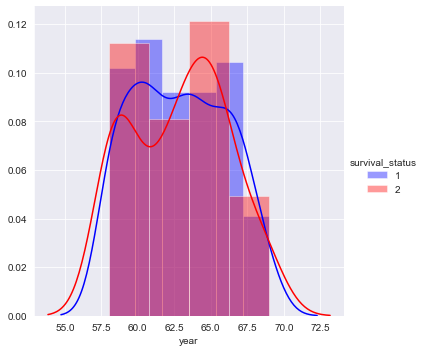

D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\YashFiles\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


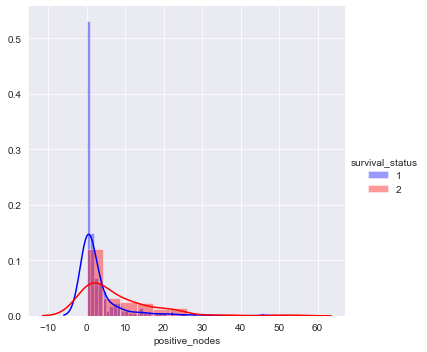

In [114]:
for index, col in enumerate(list(df.columns)[:-1]):
    figure = sns.FacetGrid(df, hue="survival_status", palette=['blue', 'red'], height=5)
    figure.map(sns.distplot, col).add_legend()
    plt.show()

<pre>
This tells us which columns are the most important and can give us any insights.
In our case, 'survival_status' is the most important variable, a dependent one. Next is 'age'
Most survivors('survival_status' == 1) have 0 to 5 nodes, as concluded earlier in df.describe()


PDF:
 [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
Bin edges:
 [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
CDF:
 [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


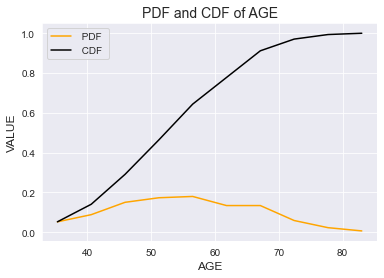

PDF:
 [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
Bin edges:
 [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
CDF:
 [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


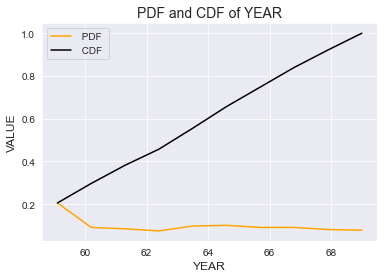

PDF:
 [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
Bin edges:
 [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
CDF:
 [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


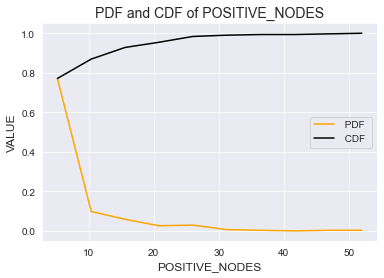

In [115]:
for index, col in enumerate(list(df.columns)[:-1]):
    counts, bin_edges = np.histogram(df[col], bins=10, density = True)

    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    print('PDF:\n', pdf)
    print('Bin edges:\n', bin_edges)
    print('CDF:\n', cdf)
    
    plt.plot(bin_edges[1:], pdf, color='orange', label=' PDF ')
    plt.plot(bin_edges[1:], cdf, color='black', label=' CDF ')
    plt.xlabel(col.upper(), size=12)
    plt.ylabel('VALUE', size=12)
    plt.title('PDF and CDF of {}'.format(col.upper()), size=14)
    plt.legend()

    plt.show()


<pre>
Looking at the final graph, we can conclude, again, that around 80% of the patients had 5 nodes or less

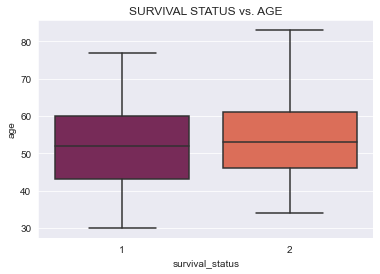

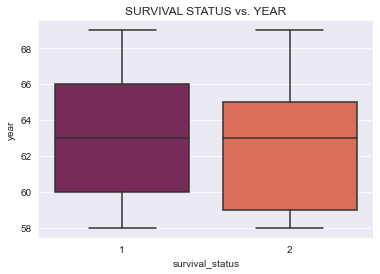

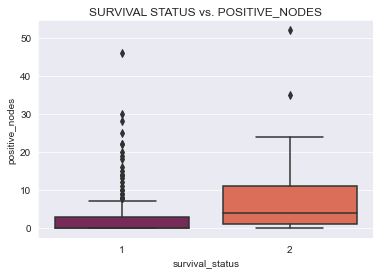

In [116]:
for index, col in enumerate(list(df.columns)[:-1]):
    sns.boxplot(data=df, x='survival_status', y=col, palette='rocket')
    plt.title('SURVIVAL STATUS vs. {}'.format(col.upper()))
    plt.show()

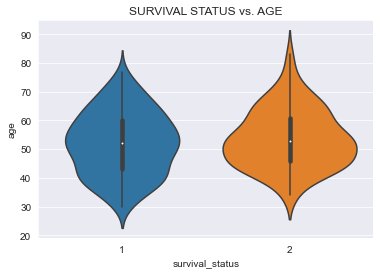

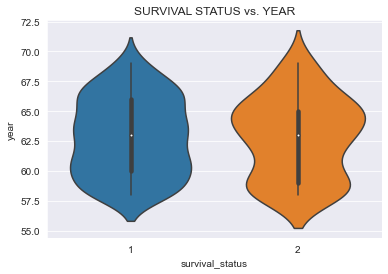

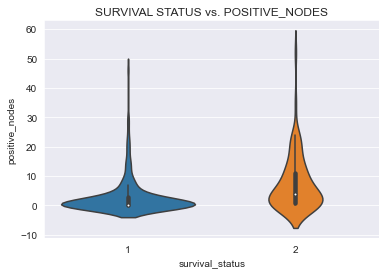

In [117]:
for index, col in enumerate(list(df.columns)[:-1]):
    sns.violinplot(data=df, x='survival_status', y=col, palette='tab10')
    plt.title('SURVIVAL STATUS vs. {}'.format(col.upper()))
    plt.show()

In [118]:
df.corr()

,age,year,positive_nodes,survival_status
age,1.000000,0.089529,-0.063176,0.067950
year,0.089529,1.000000,-0.003764,-0.004768
positive_nodes,-0.063176,-0.003764,1.000000,0.286768
survival_status,0.067950,-0.004768,0.286768,1.000000


Text(0.5, 1.0, 'Correlation heatmap')

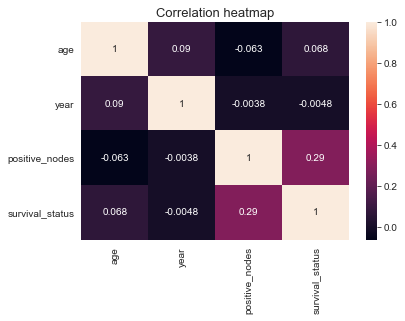

In [119]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation heatmap', size=13)

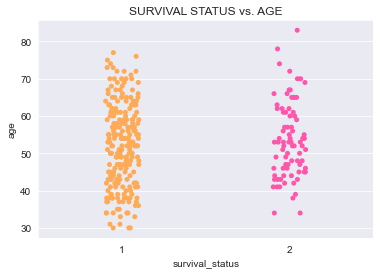

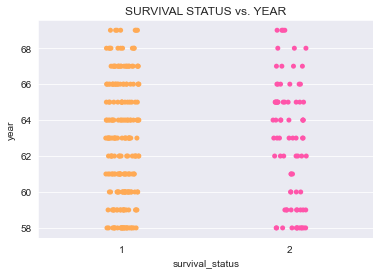

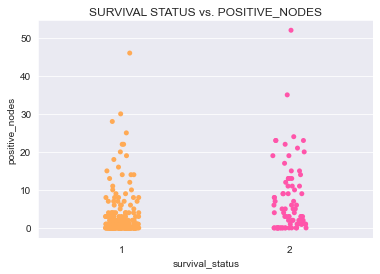

In [120]:
for index, col in enumerate(list(df.columns)[:-1]):
    sns.stripplot(data=df, x='survival_status', y=col, palette='spring_r')
    plt.title('SURVIVAL STATUS vs. {}'.format(col.upper()))
    plt.show()

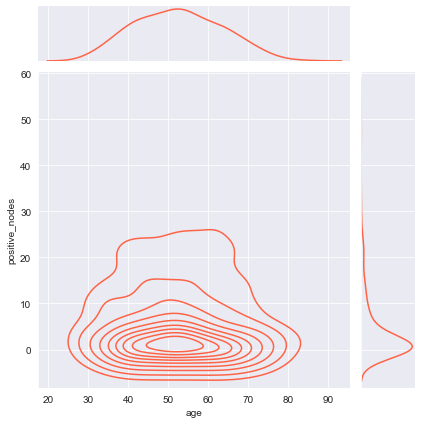

In [121]:
sns.jointplot(x="age", y="positive_nodes", data=df, color='tomato', kind='kde')

<pre>
Most patients between ages 40 to 60 have 5 nodes or less(concluded earlier)